# Sección 3: Apertura y procesamiento de imágenes

In [1]:
!pip install rasterio matplotlib numpy

## Sección 3.1: Importación y apertura de imágenes

In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path_imagen2 = "../datos/Imagen2/T33TVF_20241217T095451_"

B01 = rasterio.open(path_imagen2 + 'B01.jp2')
B02 = rasterio.open(path_imagen2 + 'B02.jp2')
B03 = rasterio.open(path_imagen2 + 'B03.jp2')
B04 = rasterio.open(path_imagen2 + 'B04.jp2')
B05 = rasterio.open(path_imagen2 + 'B05.jp2')
B06 = rasterio.open(path_imagen2 + 'B06.jp2')
B07 = rasterio.open(path_imagen2 + 'B07.jp2')
B08 = rasterio.open(path_imagen2 + 'B08.jp2')
B09 = rasterio.open(path_imagen2 + 'B09.jp2')
B10 = rasterio.open(path_imagen2 + 'B10.jp2')
B11 = rasterio.open(path_imagen2 + 'B11.jp2')
B12 = rasterio.open(path_imagen2 + 'B12.jp2')

## Sección 3.2: Visualización inicial de las bandas

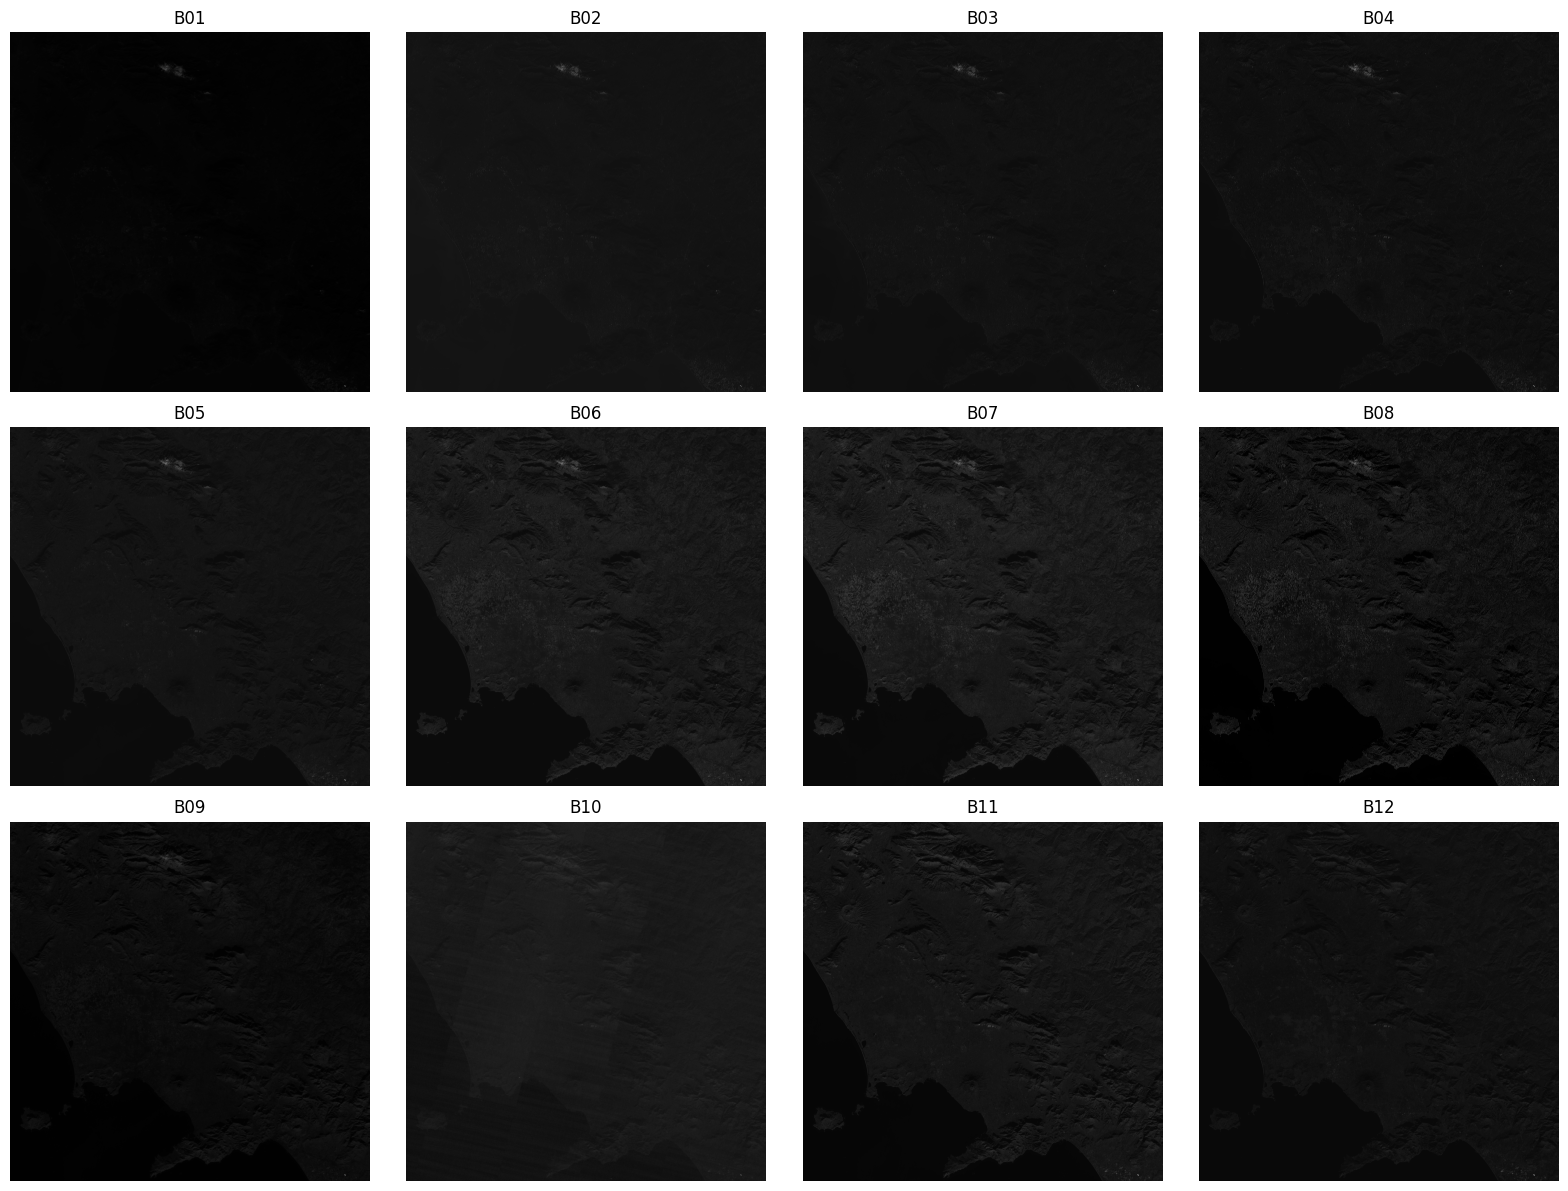

In [4]:
bandas = {
    "B01": B01,
    "B02": B02,
    "B03": B03,
    "B04": B04,
    "B05": B05,
    "B06": B06,
    "B07": B07,
    "B08": B08,
    "B09": B09,
    "B10": B10,
    "B11": B11,
    "B12": B12
}

fig, axes = plt.subplots(3, 4, figsize=(16, 12))

for i, (nombre_banda, banda) in enumerate(bandas.items()):
    ax = axes[i // 4, i % 4]
    ax.imshow(banda.read(1), cmap='gray') # Mostrar la banda en escala de grises
    ax.set_title(f"{nombre_banda}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0001..2.8].


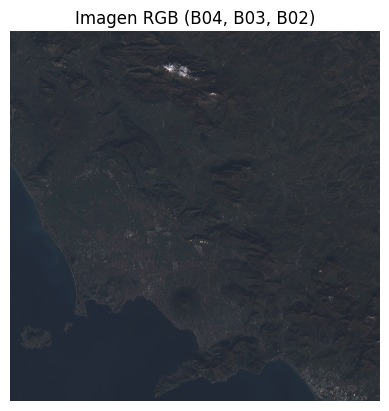

In [5]:
red = B04.read(1) / 10000
green = B03.read(1) / 10000
blue = B02.read(1) / 10000

imagen_rgb = np.dstack((red, green, blue))

plt.imshow(imagen_rgb)
plt.title("Imagen RGB (B04, B03, B02)")
plt.axis('off')
plt.show()

# Sección 5: Corrección geográfica

## Sección 5.2: Verificación de la georreferenciación

Rango de valores antes de re-proyección: 2085 - 28000
Rango de valores después de re-proyección: 0 - 24130


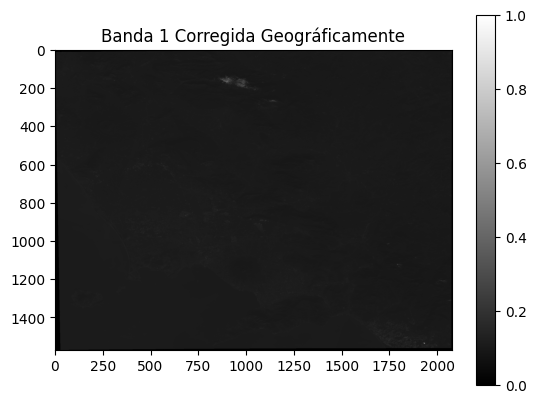

In [6]:
from rasterio.warp import reproject, Resampling, calculate_default_transform

path_imagen_banda1 = "../datos/Imagen2/T33TVF_20241217T095451_B01.jp2"

with rasterio.open(path_imagen_banda1) as src:
    crs = src.crs
    transform = src.transform
    nodata_value = src.nodata
    width = src.width
    height = src.height

    imagen_banda1 = src.read(1)

    destino_crs = "EPSG:4326"
    transform_dest, width_dest, height_dest = calculate_default_transform(
        crs, destino_crs, width, height, *src.bounds
    )

    imagen_corregida = np.empty((height_dest, width_dest), dtype=imagen_banda1.dtype)

    reproject(
        source = imagen_banda1,
        destination = imagen_corregida,
        src_transform = transform,
        src_crs = crs,
        dst_transform = transform_dest,
        dst_crs = destino_crs,
        resampling = Resampling.bilinear
    )

    print(f"Rango de valores antes de re-proyección: {imagen_banda1.min()} - {imagen_banda1.max()}")
    print(f"Rango de valores después de re-proyección: {imagen_corregida.min()} - {imagen_corregida.max()}")

    imagen_corregida_display = imagen_corregida.astype(float)
    imagen_corregida_display[imagen_corregida_display == nodata_value] = np.nan

    max_val = np.nanmax(imagen_corregida_display)
    if max_val > 0:
        imagen_corregida_display /= max_val

    plt.imshow(imagen_corregida_display, cmap='gray')
    plt.title('Banda 1 Corregida Geográficamente')
    plt.colorbar()
    plt.show()

Rango de valores antes de re-proyección: 0 - 28000
Rango de valores después de re-proyección: 0 - 28000


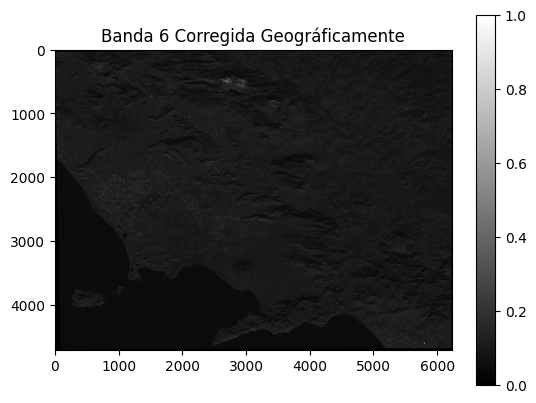

In [7]:
path_imagen_banda6 = "../datos/Imagen2/T33TVF_20241217T095451_B06.jp2"

with rasterio.open(path_imagen_banda6) as src:
    crs = src.crs
    transform = src.transform
    nodata_value = src.nodata
    width = src.width
    height = src.height

    imagen_banda6 = src.read(1)

    destino_crs = "EPSG:4326"
    transform_dest, width_dest, height_dest = calculate_default_transform(
        crs, destino_crs, width, height, *src.bounds
    )

    imagen_corregida = np.empty((height_dest, width_dest), dtype=imagen_banda6.dtype)

    reproject(
        source = imagen_banda6,
        destination = imagen_corregida,
        src_transform = transform,
        src_crs = crs,
        dst_transform = transform_dest,
        dst_crs = destino_crs,
        resampling = Resampling.bilinear
    )

    print(f"Rango de valores antes de re-proyección: {imagen_banda6.min()} - {imagen_banda6.max()}")
    print(f"Rango de valores después de re-proyección: {imagen_corregida.min()} - {imagen_corregida.max()}")

    imagen_corregida_display = imagen_corregida.astype(float)
    imagen_corregida_display[imagen_corregida_display == nodata_value] = np.nan

    max_val = np.nanmax(imagen_corregida_display)
    if max_val > 0:
        imagen_corregida_display /= max_val

    plt.imshow(imagen_corregida_display, cmap='gray')
    plt.title('Banda 6 Corregida Geográficamente')
    plt.colorbar()
    plt.show()

# Sección 6: Aplicación de índices de vegetación

## Sección 6.2: Implementación de los índices

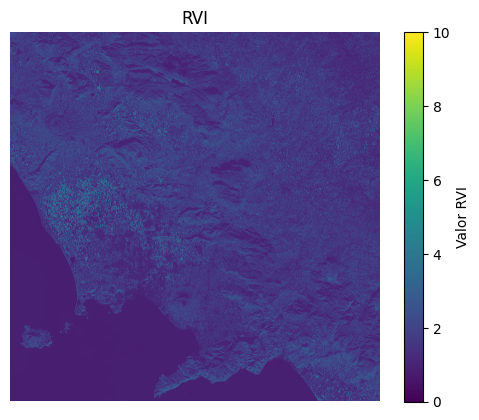

In [8]:
red = B04.read(1).astype(float)
nir = B08.read(1).astype(float)

rvi = nir / red

rvi[np.isnan(rvi)] = -9999

plt.imshow(rvi, cmap='viridis', vmin=0, vmax=10)
plt.title("RVI")
plt.colorbar(label="Valor RVI")
plt.axis('off')
plt.show()

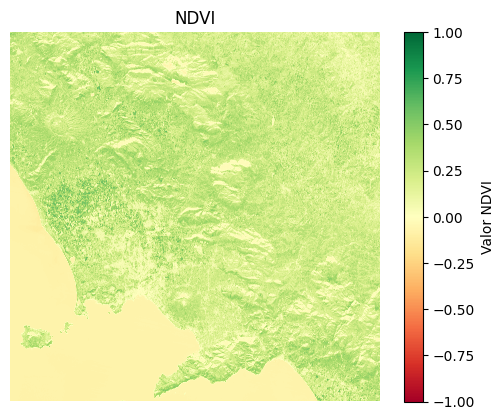

In [9]:
red = B04.read(1).astype(float)
nir = B08.read(1).astype(float)

ndvi = (nir - red) / (nir + red)

ndvi[np.isnan(ndvi)] = -9999

plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("NDVI")
plt.colorbar(label="Valor NDVI")
plt.axis('off')
plt.show()

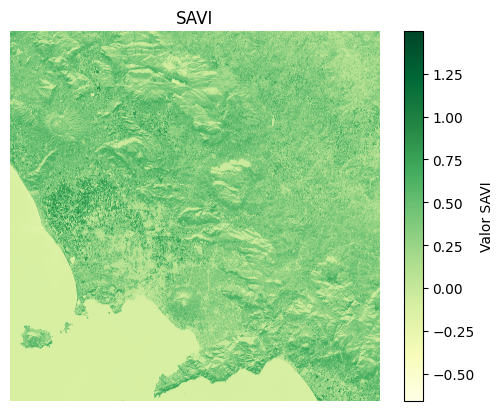

In [10]:
red = B04.read(1).astype('float32')
nir = B08.read(1).astype('float32')

L = 0.5
savi = ((nir - red) / (nir + red + L)) * (1 + L)

savi[np.isinf(savi)] = np.nan

plt.imshow(savi, cmap='YlGn')
plt.title('SAVI')
plt.colorbar(label='Valor SAVI')
plt.axis('off')
plt.show()

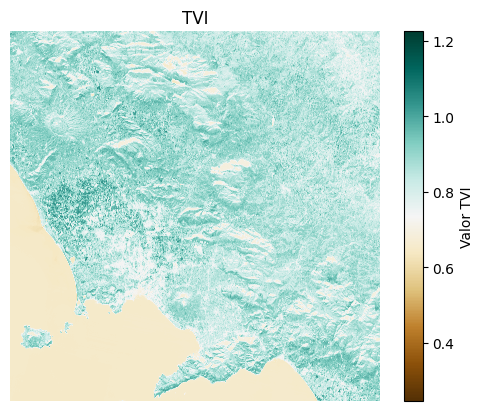

In [11]:
red = B04.read(1).astype('float32')
nir = B08.read(1).astype('float32')

ndvi = (nir - red) / (nir + red)
ndvi[np.isinf(ndvi)] = np.nan

tvi = np.sqrt((ndvi + 0.5))

tvi[np.isnan(tvi)] = 0

plt.imshow(tvi, cmap='BrBG')
plt.title('TVI')
plt.colorbar(label='Valor TVI')
plt.axis('off')
plt.show()

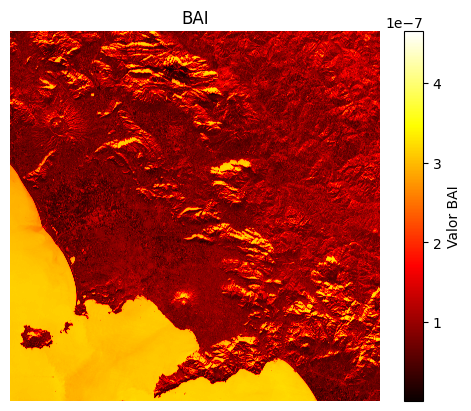

In [12]:
red = B04.read(1).astype('float32')
nir = B08.read(1).astype('float32')

bai = 1 / (((red - 0.06) ** 2) + ((nir - 0.1) ** 2))
bai[np.isinf(bai)] = np.nan

plt.imshow(bai, cmap='hot')
plt.title('BAI')
plt.colorbar(label='Valor BAI')
plt.axis('off')
plt.show()